In [23]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
%matplotlib inline

loading MHR


In [91]:
reviews_features = pd.read_csv('data/eletronic_sample_counts.csv.gz')
df_agg = reviews_features[['word_count','asin']].groupby(['asin']).agg(['count','mean'])
#df_agg['word_count'].sort_values('count',ascending=False).head(10)

len(df_agg)

383

    Unnamed: 0     alpha      beta  ndcg_mean
0            0  0.700000  0.000000   0.854048
1            1  0.800000  0.000000   0.863828
2            2  0.700000  0.100000   0.811701
3            3  0.700000  0.000000   0.854048
4            4  0.797800 -0.423466   0.729056
5            5  0.797800 -0.423466   0.729056
6            6  0.897800 -0.423466   0.727207
7            7  0.797800 -0.323466   0.778452
8            8  0.719503 -0.084446   0.867316
9            9  0.719503 -0.084446   0.867316
10          10  0.819503 -0.084446   0.879694
11          11  0.719503  0.015554   0.853416
12          12  0.869047 -0.144098   0.884983
13          13  0.869047 -0.144098   0.884983
14          14  0.969047 -0.144098   0.873564
15          15  0.869047 -0.044098   0.876027
16          16  0.816410 -0.160128   0.883840
17          17  0.816410 -0.160128   0.883840
18          18  0.916410 -0.160128   0.876381
19          19  0.816410 -0.060128   0.879459
20          20  0.858539 -0.147298

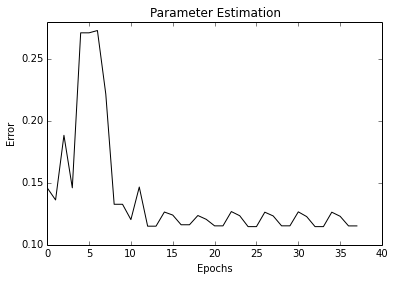

In [182]:

#while True:
#    sleep(00.5)
#    print "ok"
data = pd.read_csv("data/parameters_estimation.csv")
print data
fig,ax = plt.subplots()
ax.set_ylabel('Error')
ax.set_xlabel('Epochs')
ax.set_title('Parameter Estimation')

plt.plot(1-data.as_matrix()[:38,3], color='Black')
plt.show()

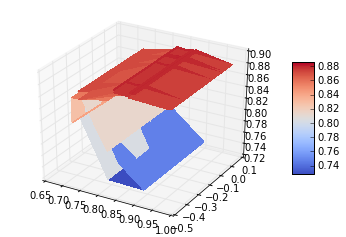

In [183]:
data = pd.read_csv("data/parameters_estimation.csv")

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

X = data['alpha'].values
Y = data['beta'].values
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
#Z = np.sin(data['ndcg_mean'].values)
Z = data['ndcg_mean'].values
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
#ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



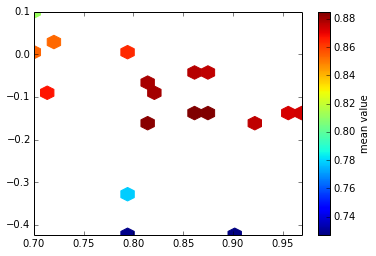

In [184]:
data = pd.read_csv("data/parameters_estimation.csv")

from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
import numpy as NP

x = data['alpha'].values
y = data['beta'].values

z = data['ndcg_mean'].values


gridsize=20
PLT.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

PLT.hexbin(x, y, C=z, gridsize=gridsize, cmap=CM.jet, bins=None)
PLT.axis([x.min(), x.max(), y.min(), y.max()])

cb = PLT.colorbar()
cb.set_label('mean value')
PLT.show()   